In [ ]:
from google.colab.patches import cv2_imshow

# Part 1
Calculation Of callibration parameters

In [ ]:
import cv2
#assert cv2.__version__[0] == '3', 'The fisheye module requires opencv version >= 3.0.0'
import numpy as np
import os
import glob




CHECKERBOARD = (6,9)
subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
_img_shape = None
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
'''give the path name of the complete folder and the extension type(Eg.jpg) for calliration'''
images = glob.glob('/content/data/Calibration/Calibration camera 1/*.jpg')
for fname in images:
    print(fname)
    img = cv2.imread(fname)
    if img.shape[0]==1960:
      img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
    if _img_shape == None:
        _img_shape = img.shape[:2]
    else:
        assert _img_shape == img.shape[:2], "All images must share the same size."
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
   
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray,corners,(3,3),(-1,-1),subpix_criteria)
        imgpoints.append(corners)
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
rms, _, _, _, _ = \
    cv2.fisheye.calibrate(
        objpoints,
        imgpoints,
        gray.shape[::-1],
        K,
        D,
        rvecs,
        tvecs,
        calibration_flags,
        (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6)
    )
print("Found " + str(N_OK) + " valid images for calibration")
print("DIM=" + str(_img_shape[::-1]))
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")

# Part 2
Undistort of Images with the above found callibration parameters

In [ ]:
from PIL import Image

def merge_images(file1, file2):
    """Merge two images into one, displayed side by side
    :param file1: path to first image file
    :param file2: path to second image file
    :return: the merged Image object
    """
    image1 = file1
    image2 = file2

    (width1, height1) = image1.size
    (width2, height2) = image2.size

    result_width = width1 + width2
    result_height = max(height1, height2)

    result = Image.new('RGB', (result_width, result_height))
    result.paste(im=image1, box=(0, 0))
    result.paste(im=image2, box=(width1, 0))
    return result

original_img:


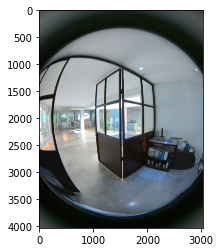

undistort_img:


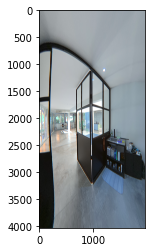

original_img:


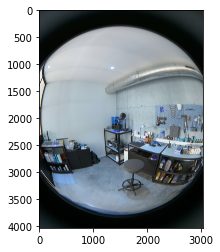

undistort_img:


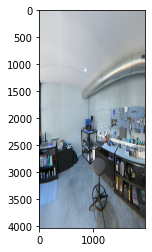

original_img:


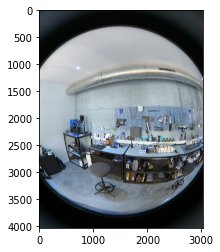

undistort_img:


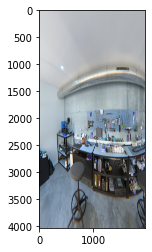

original_img:


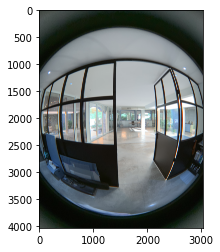

undistort_img:


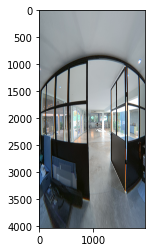

original_img:


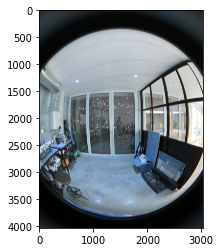

undistort_img:


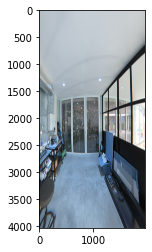

original_img:


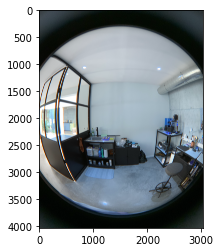

undistort_img:


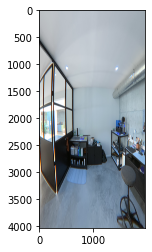

original_img:


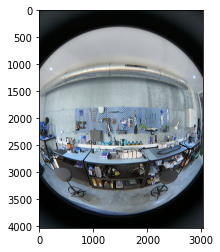

undistort_img:


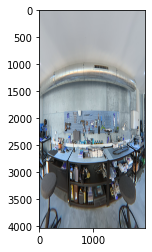

original_img:


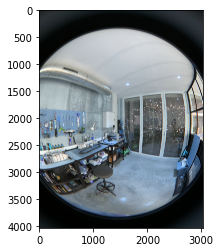

undistort_img:


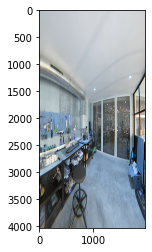

original_img:


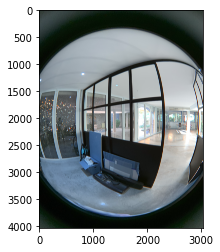

undistort_img:


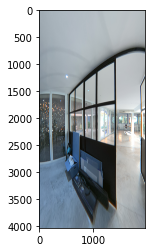

0


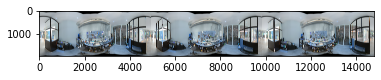

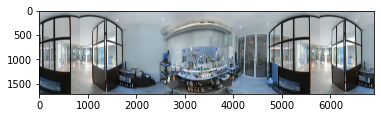

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob

'''specicy crop as True to enable cropping else specify it as False'''
crop=True
'''specify merge as True if you want first nad last frame to be same'''
merge=True
 
 

'''paste the below line as it is in the output of "Calculation Of callibration parameters" cell'''
DIM=(1960, 4032)
K=np.array([[1490.958153296559, 0.0, 934.6308090988289], [0.0, 1495.6913177936804, 2031.991333042028], [0.0, 0.0, 1.0]])
D=np.array([[0.07430943385742841], [-0.17851001860964297], [0.10478376072461774], [-0.07132163636034114]])
def undistort(img_path, balance=0.0, dim2=None, dim3=None):
    img = cv2.imread(img_path)
    if img.shape!=DIM:
      img=cv2.resize(img,DIM)
    dim1 = img.shape[:2][::-1]  #dim1 is the dimension of input image to un-distort
    assert dim1[0]/dim1[1] == DIM[0]/DIM[1], "Image to undistort needs to have same aspect ratio as the ones used in calibration"
    if not dim2:
        dim2 = dim1
    if not dim3:
        dim3 = dim1
    scaled_K = K * dim1[0] / DIM[0]  # The values of K is to scale with image dimension.
    scaled_K[2][2] = 1.0  # Except that K[2][2] is always 1.0
    # This is how scaled_K, dim2 and balance are used to determine the final K used to un-distort image. OpenCV document failed to make this clear!
    new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, dim2, np.eye(3), balance=balance)
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), new_K, dim3, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    plt.imshow(undistorted_img)
    plt.show()
    return undistorted_img
if __name__ == '__main__':
  '''give the folder name with extention below thats needs to be stiched'''
  images = glob.glob('/content/data/Image set 5/*.jpg')
 # stitcher =cv2.createStitcher()
  stitcher = cv2.Stitcher_create()
  images1 = []
 
  for fname in images:
    print('original_img:')
    img = cv2.imread(fname)
    plt.imshow(img )
    plt.show()
    print('undistort_img:')
    images1.append(undistort(fname ,0))
status=1
chck=0
while(status!=0):
  (status, stitched) = stitcher.stitch(images1)
  chck=chck+1
  if chck==5:
    break
print(status)
org=stitched
if status==0:
  if merge==True:
   img = cv2.cvtColor(stitched ,cv2.COLOR_BGR2RGB)
   im_pil = Image.fromarray(img)
   im_pil=merge_images(im_pil,merge_images(im_pil,im_pil))
   
   im_np = np.asarray(im_pil)
   stitched=cv2.cvtColor( im_np, cv2.COLOR_RGB2BGR) 
   plt.imshow(stitched)
   plt.show()

if status==0:
  if crop==True:
    stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10,
    cv2.BORDER_CONSTANT, (0, 0, 0))
    # convert the stitched image to grayscale and threshold it
    # such that all pixels greater than zero are set to 255
    # (foreground) while all others remain 0 (background)
    gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
    cnts,_= cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    
    c = max(cnts, key=cv2.contourArea)
    # allocate memory for the mask which will contain the
    # rectangular bounding box of the stitched image region
    mask = np.zeros(thresh.shape, dtype="uint8")
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)
    minRect = mask.copy()
    sub = mask.copy()
    # keep looping until there are no non-zero pixels left in the
    # subtracted image
    while cv2.countNonZero(sub) > 0:
      # erode the minimum rectangular mask and then subtract
      # the thresholded image from the minimum rectangular mask
      # so we can count if there are any non-zero pixels left
      minRect = cv2.erode(minRect, None)
      sub = cv2.subtract(minRect, thresh)
    
    cnts,_ = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)
    #cnts = imutils.grab_contours(cnts)
    
    c = max(cnts, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    # use the bounding box coordinates to extract the our final
    # stitched image
    stitched = stitched[y:y + h, x:x + w]
  '''give the name and path of new stictched image file.'''

if status==0:
  
 if merge==True:
  img = cv2.cvtColor(stitched ,cv2.COLOR_BGR2RGB)
  im_pil = Image.fromarray(img)
  (width1, height1) = Image.fromarray(org).size
  (_,height1)=im_pil.size
  w1=width1-(0.2)*width1
  w2=(2*width1)+(0.2)*width1
  img_area = (w1, 0, w2, height1)
  img =  im_pil.crop(img_area)
  im_np = np.asarray(img)
  stitched=cv2.cvtColor( im_np, cv2.COLOR_RGB2BGR) 

cv2.imwrite('img_51.jpg',stitched)
plt.imshow(stitched)

Some sample outputs

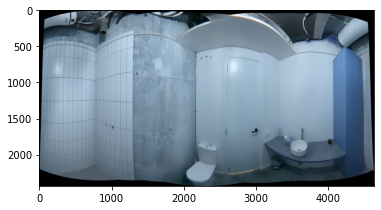

In [ ]:
plt.imshow(stitched)

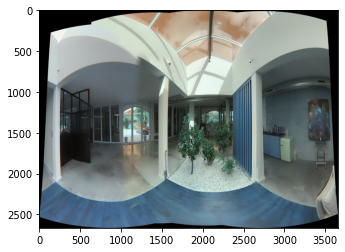

In [ ]:
plt.imshow(stitched)

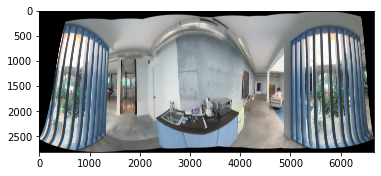

In [ ]:
plt.imshow(stitched)

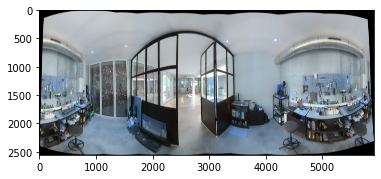

In [ ]:
plt.imshow(stitched)

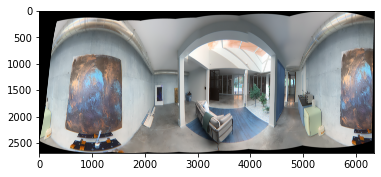

In [ ]:
plt.imshow(stitched)